In [1]:
from nselib import capital_market
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot
import pylab
plt.style.use("ggplot")

# Retrieving Data Using nselib

## Stock Basic Info
* Retrieving and Scraping Stock Basic Info like "Company Name," "Date of Listing," & "Face Value" of Shares
* Searching for stocks using their SYMBOL given by NSE (National Stock Exchange)

In [2]:
stock = 'tatamotors'
all_stockes = capital_market.equity_list()

In [3]:
months = {'JAN':'01','FEB':'02','MAR':'03','APR':'04','MAY':'05','JUN':'06',
         'JUL':'07','AUG':'08','SEP':'09','OCT':'10','NOV':'11','DEC':'12'}
for key in months.keys():
    all_stockes[' DATE OF LISTING'] = all_stockes[' DATE OF LISTING'].str.replace(key, months[key])

In [4]:
stock_info = all_stockes[(all_stockes['SYMBOL'].str.upper() == stock.upper())]
stock_date_of_listing = stock_info[' DATE OF LISTING'].values[0]
stock_info

,SYMBOL,NAME OF COMPANY,SERIES,DATE OF LISTING,FACE VALUE
1818,TATAMOTORS,Tata Motors Limited,EQ,22-07-1998,2


# Historical Data of the Stock up to 15-Jan-2025

In [5]:
today = date.today()
df = capital_market.price_volume_and_deliverable_position_data(symbol=stock.upper(),
                                                               from_date=stock_date_of_listing,
                                                               to_date='15-01-2025')
df.tail(5)

/home/sptrop/Desktop/.desk/Jupyter/venv/lib/python3.12/site-packages/nselib/capital_market/capital_market_data.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  nse_df = pd.concat([nse_df, data_df], ignore_index=True)


,Symbol,Series,Date,PrevClose,OpenPrice,HighPrice,LowPrice,LastPrice,ClosePrice,AveragePrice,TotalTradedQuantity,TurnoverInRs,No.ofTrades,DeliverableQty,%DlyQttoTradedQty,"ï»¿""Symbol"""
8022,NaN,EQ,09-Jan-2025,794.95,800.00,810.00,769.45,781.40,780.10,784.85,"1,79,48,464","14,08,69,40,933.35","3,66,805","55,60,219",30.98,TATAMOTORS
8023,NaN,EQ,10-Jan-2025,780.10,780.05,787.95,766.80,776.50,774.65,778.29,"1,11,44,005","8,67,32,68,253.45","2,74,052","23,69,387",21.26,TATAMOTORS
8024,NaN,EQ,13-Jan-2025,774.65,769.00,773.55,748.80,750.60,751.00,760.91,"1,22,30,175","9,30,61,20,971.50","3,05,264","43,43,305",35.51,TATAMOTORS
8025,NaN,EQ,14-Jan-2025,751.00,751.50,779.00,751.50,772.30,770.50,772.37,"1,13,77,053","8,78,72,40,473.25","2,77,895","33,04,819",29.05,TATAMOTORS
8026,NaN,EQ,15-Jan-2025,770.50,771.00,785.00,756.05,763.00,763.60,766.16,"1,05,00,910","8,04,54,21,842.20","2,49,215","34,68,381",33.03,TATAMOTORS


# Collective Analysis & Processing of Stock Data
- Data Cleaning
- Data Transformation

In [6]:
df.shape

(8027, 16)

In [7]:
df.columns

Index(['Symbol', 'Series', 'Date', 'PrevClose', 'OpenPrice', 'HighPrice',
       'LowPrice', 'LastPrice', 'ClosePrice', 'AveragePrice',
       'TotalTradedQuantity', 'TurnoverInRs', 'No.ofTrades', 'DeliverableQty',
       '%DlyQttoTradedQty', 'ï»¿"Symbol"'],
      dtype='object')

## Data Cleaning & Transformation

- Dropping the "Symbol" column as it contains all Null Values. Setting the "Date" column as our new index for better referencing.

In [8]:
df.drop(columns=['Symbol'], inplace=True, axis=1)
df.set_index('Date', inplace=True)

In [9]:
df.replace({',':'','-':np.nan},regex=True,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8027 entries, 22-Jul-1998 to 15-Jan-2025
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Series               8027 non-null   object
 1   PrevClose            8027 non-null   object
 2   OpenPrice            8023 non-null   object
 3   HighPrice            8023 non-null   object
 4   LowPrice             8023 non-null   object
 5   LastPrice            8027 non-null   object
 6   ClosePrice           8027 non-null   object
 7   AveragePrice         8027 non-null   object
 8   TotalTradedQuantity  8027 non-null   object
 9   TurnoverInRs         8027 non-null   object
 10  No.ofTrades          3401 non-null   object
 11  DeliverableQty       6558 non-null   object
 12  %DlyQttoTradedQty    6558 non-null   object
 13  ï»¿"Symbol"          8027 non-null   object
dtypes: object(14)
memory usage: 940.7+ KB


- Changing the column's data types to their appropriate data types.
- Changing the names of some columns.

In [11]:
df.rename(columns={'ï»¿"Symbol"':'Symbol', '%DlyQttoTradedQty':'Dly_Qt_to_Traded_Qty%'}, inplace=True)
num_columns = ['PrevClose', 'OpenPrice', 'HighPrice',
       'LowPrice', 'LastPrice', 'ClosePrice', 'AveragePrice',
       'TotalTradedQuantity', 'TurnoverInRs', 'No.ofTrades', 'DeliverableQty',
       'Dly_Qt_to_Traded_Qty%']
for coll in num_columns:
    df[coll] = df[coll].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8027 entries, 22-Jul-1998 to 15-Jan-2025
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Series                 8027 non-null   object 
 1   PrevClose              8027 non-null   float32
 2   OpenPrice              8023 non-null   float32
 3   HighPrice              8023 non-null   float32
 4   LowPrice               8023 non-null   float32
 5   LastPrice              8027 non-null   float32
 6   ClosePrice             8027 non-null   float32
 7   AveragePrice           8027 non-null   float32
 8   TotalTradedQuantity    8027 non-null   float32
 9   TurnoverInRs           8027 non-null   float32
 10  No.ofTrades            3401 non-null   float32
 11  DeliverableQty         6558 non-null   float32
 12  Dly_Qt_to_Traded_Qty%  6558 non-null   float32
 13  Symbol                 8027 non-null   object 
dtypes: float32(12), object(2)
memory usage: 564.

In [12]:
df[pd.isna(df['OpenPrice'])]

,Series,PrevClose,OpenPrice,HighPrice,LowPrice,LastPrice,ClosePrice,AveragePrice,TotalTradedQuantity,TurnoverInRs,No.ofTrades,DeliverableQty,Dly_Qt_to_Traded_Qty%,Symbol
Date,,,,,,,,,,,,,,
31-Mar-1999,BE,160.0,NaN,NaN,NaN,160.0,170.000000,170.000000,56100.0,9537000.0,NaN,NaN,NaN,TELCO
14-Jul-1999,BE,280.0,NaN,NaN,NaN,280.0,280.000000,280.000000,100000.0,28000000.0,NaN,NaN,NaN,TELCO
19-Jul-1999,BE,280.0,NaN,NaN,NaN,280.0,284.100006,284.100006,50000.0,14205000.0,NaN,NaN,NaN,TELCO
15-Nov-2000,BE,96.0,NaN,NaN,NaN,96.0,80.000000,80.000000,20000.0,1600000.0,NaN,NaN,NaN,TELCO


- As there are NO transactional entries for this day, we are dropping this column.

In [13]:
df.dropna(subset=['OpenPrice'],axis=0, inplace=True)
df.shape

(8023, 14)

## Overview of the DataFrame

In [14]:
df.describe(include=['object','bool'])

,Series,Symbol
count,8023,8023
unique,10,2
top,EQ,TATAMOTORS
freq,6605,5441


In [15]:
df['Series'].unique()

array(['AE', 'EQ', 'N1', 'BE', 'D1', 'S1', 'W1', 'N2', 'N3', 'BL'],
      dtype=object)

In [16]:
df.describe()

,PrevClose,OpenPrice,HighPrice,LowPrice,LastPrice,ClosePrice,AveragePrice,TotalTradedQuantity,TurnoverInRs,No.ofTrades,DeliverableQty,Dly_Qt_to_Traded_Qty%
count,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.0,8.023000e+03,3.401000e+03,6558.00,6558.000000
mean,374.387085,375.204163,381.307648,368.250641,374.575562,374.553619,374.854858,9280514.0,3.006631e+09,1.603747e+05,2843321.75,42.201302
std,272.964783,273.615448,277.276794,268.999084,273.113190,273.052734,273.129791,19642730.0,5.337049e+09,1.303087e+05,3728222.50,22.916948
min,1.000000,1.200000,1.200000,1.200000,1.200000,1.200000,1.200000,1.0,1.200000e+00,1.000000e+00,1.00,0.370000
25%,149.750000,150.000000,152.750000,146.224998,150.000000,149.750000,149.349998,800570.5,1.493211e+08,8.290100e+04,488938.50,25.282501
50%,309.950012,310.000000,315.700012,304.750000,309.500000,310.000000,310.799988,3338799.0,1.608143e+09,1.221240e+05,1686172.00,38.810001
75%,494.625000,496.024994,504.224991,487.774994,495.000000,494.649994,496.559998,9048693.0,3.514365e+09,1.924730e+05,3999328.00,53.197502
max,1365.150024,1361.000000,1382.000000,1347.000000,1362.000000,1365.150024,1362.150024,390577824.0,9.853175e+10,1.517162e+06,73338480.00,100.000000


- According to the above "Description," it seems like 'PrevClose', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', and 'AveragePrice' are highly positively correlated with each other. Let's understand this better using graphs.

## Graphical Analysis

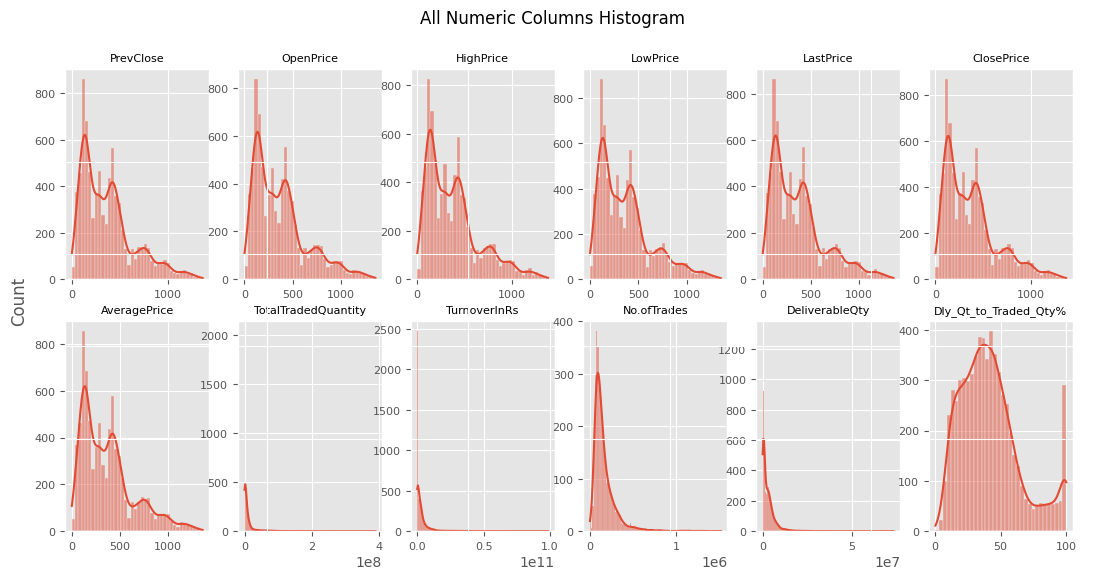

In [17]:
plt.figure(figsize=(13,6))
row = 2
col = 6
for index in range(len(num_columns)):
    plt.subplot(row,col,index+1)
    sns.histplot(df[num_columns[index]],kde=True)
    plt.title(f'{num_columns[index]}', fontsize=8)
    plt.xlabel('',fontsize=8)
    plt.xticks(fontsize=8)
    plt.ylabel('',fontsize=8)
    plt.yticks(fontsize=8)

plt.subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel("Count")
plt.suptitle("All Numeric Columns Histogram")
plt.show()

- From the observation of the above graphs, we can clearly conclude that 'PrevClose', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', and 'AveragePrice' are quite similar in form.
- We can also say that 'TotalTradedQuantity', 'TurnoverInRs', and 'DeliverableQty' might be following a Pareto Distribution or could be a Log-Normal Distribution. This will be analyzed in the Individual Analysis of this DataFrame.
- We can also say that 'No.ofTrades' might be following a Log-Normal Distribution. This will be analyzed in the Individual Analysis of this DataFrame.

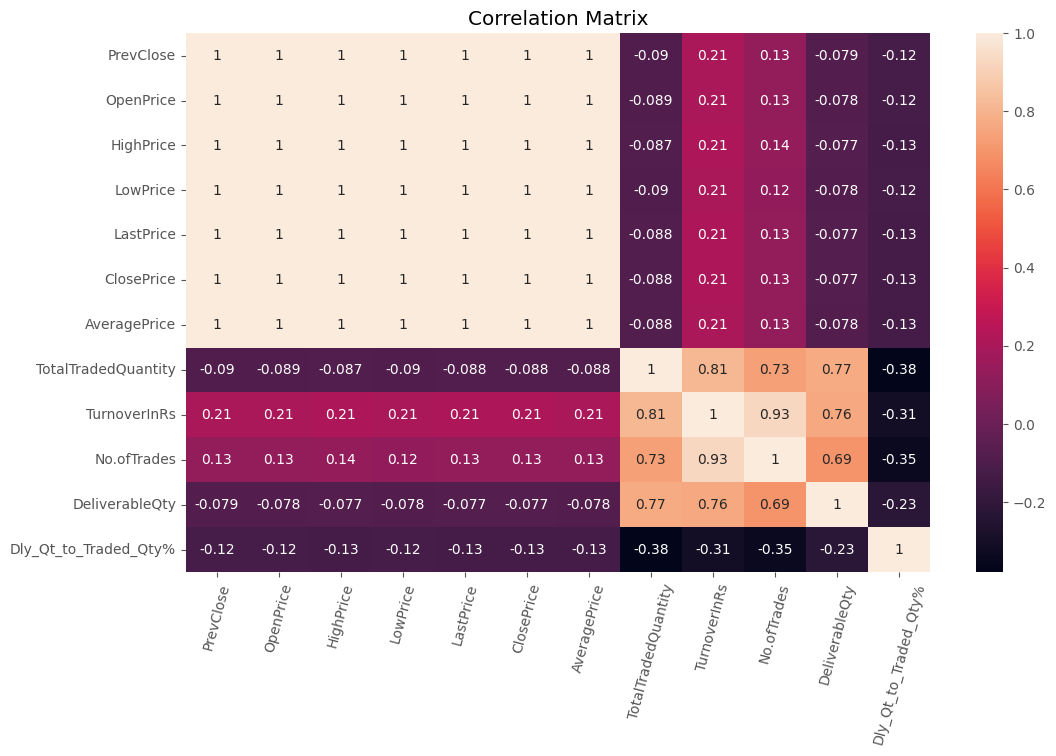

In [18]:
plt.figure(figsize=(12,7))
sns.heatmap(df[num_columns].corr(), annot=True)
plt.xticks(rotation=75)
plt.title("Correlation Matrix")
plt.show()

- As per the above observation, there is a perfect correlation fact between all the prices.
- It also conveys that 'TotalTradedQuantity', 'TurnoverInRs', 'No.ofTrades', and 'DeliverableQty' are highly positively correlated with each other and also have a negative correlation with 'Dly_Qt_to_Traded_Qty%', which can further be used for comparative analysis.

## Individual Column Analysis of Stock Data

### Analyzing the Price Category of the Dataset
- ### Considering that all Prices have perfectly positive correlation with each other
  - #### The analysis is done only on the ClosePrice of the stock (Making a combined conclusion for other Price categories)
  - #### This Price Category includes ('PrevClose', 'OpenPrice', 'HighPrice', 'LowPrice', 'LastPrice', 'ClosePrice', & 'AveragePrice')
  - #### Considering only the last 60 days for analysis

### Quick Comparison between ClosePrice & AveragePrice
- Trend in Market (Bullish or Bearish)

In [19]:
tail_ClosePrice = df[['ClosePrice']].tail(60).copy()

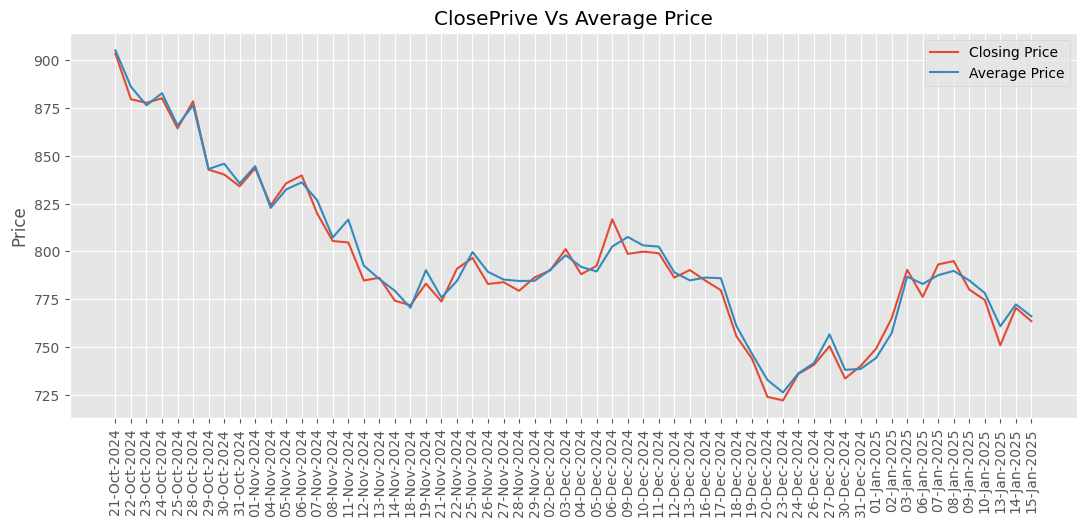

In [20]:
plt.figure(figsize=(13,5))
plt.plot(tail_ClosePrice, label='Closing Price')
plt.plot(df['AveragePrice'].tail(60), label='Average Price')
plt.title('ClosePrive Vs Average Price')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.legend()
plt.show()

- This shows the bearish trend of Tata Motors on the market.

### Detailed Analysis of Price Category Data
- Using Five-Number Summary

In [21]:
def Q1_Q3(df):
    sorted_df = df.sort_values(by=df.columns[0])
    Q1, Q3 = np.quantile(sorted_df, [.25,.75])
    return Q1, Q3

In [22]:
Q1,Q3 = Q1_Q3(tail_ClosePrice)

In [23]:
IQR = Q3-Q1

In [24]:
Lower_Fence = Q1 - (1.5*IQR)
Higher_Fence = Q3 + (1.5*IQR)

In [25]:
fense_range = tail_ClosePrice[(tail_ClosePrice['ClosePrice'] >= Lower_Fence) & (tail_ClosePrice['ClosePrice'] < Higher_Fence)]

In [26]:
# Nearest Values to Lower Fense in our Data Set with in this fence
LF = np.abs(fense_range - Lower_Fence)
LF_index = LF.sort_values(by='ClosePrice').index[0]
Lower_Fence = tail_ClosePrice['ClosePrice'].loc[LF_index]

In [27]:
# Nearest Values to Higher Fence in our Data Set with in this fence
HF = np.abs(fense_range - Higher_Fence)
HF_index = HF.sort_values(by='ClosePrice').index[0]
Higher_Fence = tail_ClosePrice['ClosePrice'].loc[HF_index]

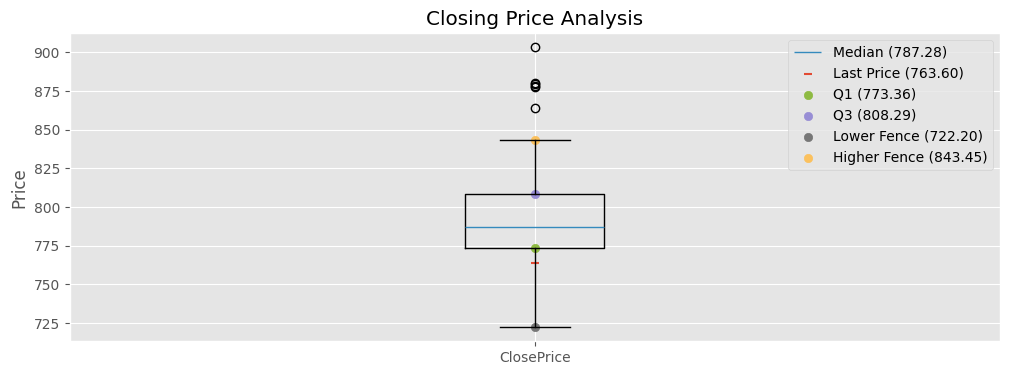

In [28]:
plt.figure(figsize=(12,4))

plt.boxplot(tail_ClosePrice,
            label='Median ({0:.2f})'.format(tail_ClosePrice.median().values[0]))
plt.scatter(1,tail_ClosePrice.tail(1),
            label='Last Price ({0:.2f})'.format(tail_ClosePrice[['ClosePrice']].tail(1).values[0][0]),
            color='C0',
            marker='_')
plt.scatter(1,Q1,
            label=f'Q1 ({round(Q1,2)})',
            color='C5')
plt.scatter(1,Q3,
            label=f'Q3 ({round(Q3,2)})',
            color='C2')
plt.scatter(1,Lower_Fence,
            label='Lower Fence ({0:.2f})'.format(Lower_Fence),
            color='C3')
plt.scatter(1,Higher_Fence,
            label='Higher Fence ({0:.2f})'.format(Higher_Fence),
            color='C4')

plt.title("Closing Price Analysis")
plt.ylabel('Price')
plt.xticks([1],['ClosePrice'])
plt.legend()
plt.show()

### Conclusion (21-Oct-2024 to 15-Jan-2025)
- Median: States that the share price is highly concentrated around 787.28 Rs.
- Interquartile Range (IQR): The stock has mostly fluctuated within the range of Q1 (773.36 Rs) to Q3 (808.29 Rs).
- Last Price: Closing price on 15-Jan-2025.
- Lower Fence: A potential lower limit can be set at 722.20 Rs. If the stock price breaks below this limit, it could indicate a bearish market trend.
- Higher Fence: A potential upper limit can be set at 843.45 Rs. If the stock price breaks above this limit, it could indicate a bullish market trend.

### Days and their relevant closing prices where the stock performed extremely high (Outliers)
- As per 60-Day Analysis

In [29]:
pd.DataFrame(df['ClosePrice'].tail(60)[df['ClosePrice'] > Higher_Fence])

,ClosePrice
Date,
21-Oct-2024,903.299988
22-Oct-2024,879.500000
23-Oct-2024,877.650024
24-Oct-2024,880.000000
25-Oct-2024,864.299988
28-Oct-2024,878.450012


### Days and their relevant closing prices where the stock performed extremely low (Outliers)
- As per 60-Day Analysis

In [30]:
pd.DataFrame(df['ClosePrice'].tail(60)[df['ClosePrice'] < Lower_Fence])

,ClosePrice
Date,


### Analyzing the Price Volume & Deliverable Position of the Dataset
- #### Columns included: ('TotalTradedQuantity', 'TurnoverInRs', 'No.ofTrades', 'DeliverableQty', 'Dly_Qt_to_Traded_Qty%')

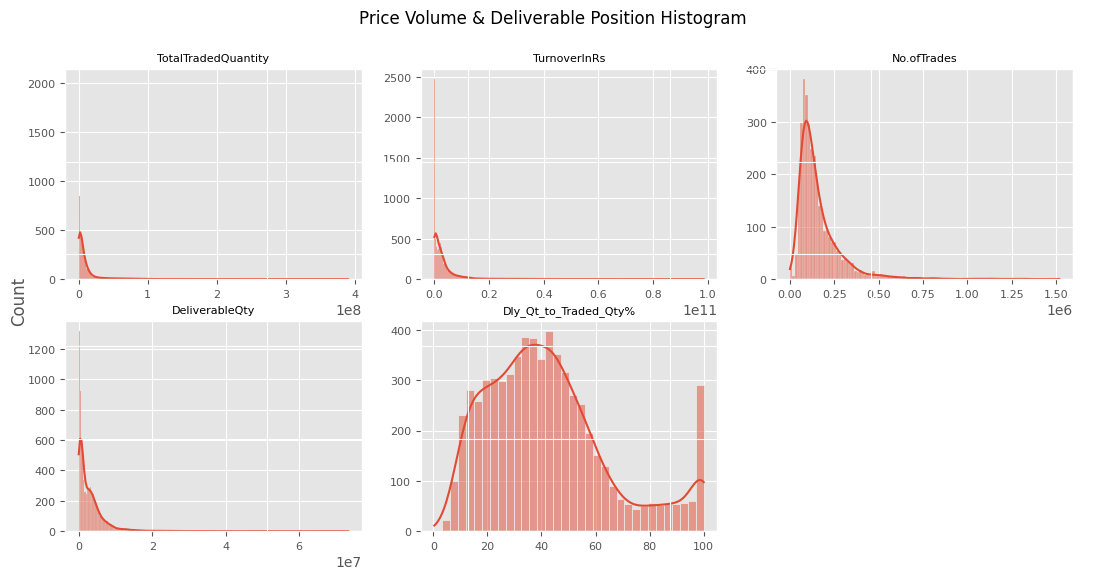

In [31]:
plt.figure(figsize=(13,6))
row = 2
col = 3
for index in range(len(num_columns[7:])):
    plt.subplot(row,col,index+1)
    sns.histplot(df[num_columns[index+7]],kde=True)
    plt.title(f'{num_columns[index+7]}', fontsize=8)
    plt.xlabel('',fontsize=8)
    plt.xticks(fontsize=8)
    plt.ylabel('',fontsize=8)
    plt.yticks(fontsize=8)

plt.subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel("Count")
plt.suptitle("Price Volume & Deliverable Position Histogram")
plt.show()

#### Since the log-normal distribution makes the normal distribution log-normal to the variable:
- Checking the log-normality of the data using a normality test.
- Columns used for the test: ('TotalTradedQuantity', 'TurnoverInRs', 'No.ofTrades', 'DeliverableQty')

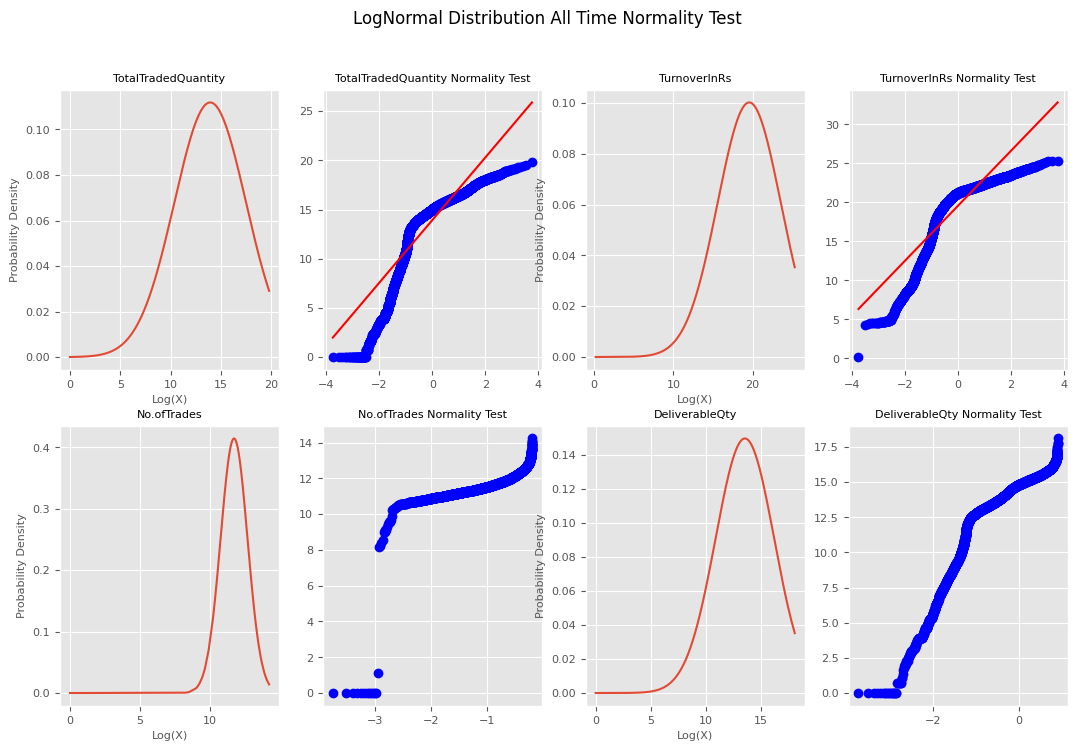

In [32]:
plt.figure(figsize=(13,8))
row = 2
col = 4
c1 = 1
for index in range(len(num_columns[7:11])):
    sorted_array = pd.DataFrame(np.log(df[num_columns[index+7]])).sort_values(by=num_columns[index+7])
    
    plt.subplot(row,col,index+c1)
    plt.plot(sorted_array,norm.pdf(sorted_array, sorted_array.mean(), sorted_array.std()))
    plt.title(f'{num_columns[index+7]}', fontsize=8)
    plt.xlabel('Log(X)',fontsize=8)
    plt.xticks(fontsize=8)
    plt.ylabel('Probability Density',fontsize=8)
    plt.yticks(fontsize=8)
    c1+=1

    plt.subplot(row,col,index+c1)
    probplot(np.sort(np.log(df[num_columns[index+7]])), dist='norm', plot=plt)
    plt.title(f'{num_columns[index+7]} Normality Test', fontsize=8)
    plt.xlabel('',fontsize=8)
    plt.xticks(fontsize=8)
    plt.ylabel('',fontsize=8)
    plt.yticks(fontsize=8)
plt.suptitle("LogNormal Distribution All Time Normality Test")
plt.show()

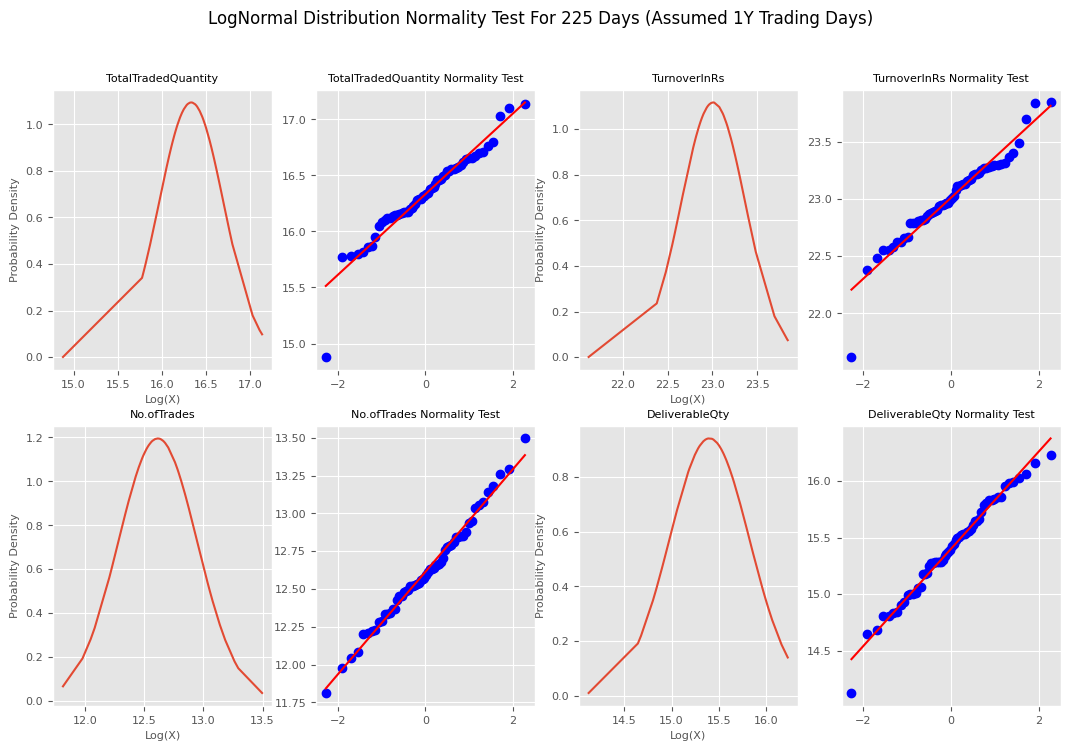

In [33]:
plt.figure(figsize=(13,8))
row = 2
col = 4
c1 = 1
for index in range(len(num_columns[7:11])):
    sorted_array = pd.DataFrame(np.log(df[num_columns[index+7]].tail(60))).sort_values(by=num_columns[index+7])
    
    plt.subplot(row,col,index+c1)
    plt.plot(sorted_array,norm.pdf(sorted_array, sorted_array.mean(), sorted_array.std()))
    plt.title(f'{num_columns[index+7]}', fontsize=8)
    plt.xlabel('Log(X)',fontsize=8)
    plt.xticks(fontsize=8)
    plt.ylabel('Probability Density',fontsize=8)
    plt.yticks(fontsize=8)
    c1+=1

    plt.subplot(row,col,index+c1)
    probplot(np.sort(np.log(df[num_columns[index+7]].tail(60))), dist='norm', plot=plt)
    plt.title(f'{num_columns[index+7]} Normality Test', fontsize=8)
    plt.xlabel('',fontsize=8)
    plt.xticks(fontsize=8)
    plt.ylabel('',fontsize=8)
    plt.yticks(fontsize=8)
plt.suptitle("LogNormal Distribution Normality Test For 225 Days (Assumed 1Y Trading Days)")
plt.show()

### Conclusion
- None of the Columns exhibit a Log-Normal Distribution when the entire dataset is considered.
- However, when tested on the last 60 days, all columns appear to follow a Log-Normal Distribution.
- This change in behavior could be attributed to the presence of primary and secondary trends.
  - For example, a market might exhibit long-term growth while simultaneously experiencing short-term periods of extremely slow/fast growth or even declines.
- Since the last 60 days of data appear to follow a Log-Normal Distribution, properties associated with this distribution can be applied to the data.
  - Such as calculating probabilities within different ranges.

### Statistical Calculation on Last 60 Days "No. of Trades" Column
- Finding the range of "No. of Trades" is being determined with a 95% confidence interval.

In [34]:
CI = 0.95
alpha = 1 - CI
Z_score = -2.81

In [35]:
NoOfTrudes = np.log(df["No.ofTrades"].tail(60))

In [36]:
CI_upper_lim = NoOfTrudes.mean() + (Z_score*NoOfTrudes.std()/np.sqrt(len(NoOfTrudes)))
CI_lower_lim = NoOfTrudes.mean() - (Z_score*NoOfTrudes.std()/np.sqrt(len(NoOfTrudes)))

In [37]:
upper_lim = np.exp(CI_upper_lim)
lower_lim = np.exp(CI_lower_lim)
upper_lim, lower_lim

(np.float64(266357.1524591027), np.float64(339346.14525867015))

### Conclusion As Per The Calculation
- The number of trades done in a day is estimated to be within the range of 266,357.15 to 339,346.15.